# Numpy

In [28]:
import numpy as np

# так мы можем создать numpy-массив из тапла таплов

a = np.array([(1,2,3),(4,5,6)])

print("Array data type:", a.dtype)
print("Array size : ", a.size)
print("Array shape: ", a.shape)

Array data type: int64
Array size :  6
Array shape:  (2, 3)


In [29]:
print("Array size in bytes: ", a.itemsize)

Array size in bytes:  8


In [30]:
b = a.astype(np.int16)
print("Array size in bytes: ", b.itemsize)

Array size in bytes:  2


In [31]:
a = np.array([(1,2,3),(4,5,6)], dtype=np.float64)

print(a)
print("Dims:", a.ndim)
print("Shape:", a.shape)

[[1. 2. 3.]
 [4. 5. 6.]]
Dims: 2
Shape: (2, 3)


In [32]:
a = a.reshape(3, 2)

print(a)
print("Dims:", a.ndim)
print("Shape:", a.shape)

[[1. 2.]
 [3. 4.]
 [5. 6.]]
Dims: 2
Shape: (3, 2)


In [38]:
# для того, чтобы "расплющить" массив, есть функция ravel
# по дефолту он отрабатывает в row-major манере 
# т.е, индекс младшей оси меняется медленнее всего
# индекс старшей - быстрее всего

a.ravel()

array([1., 2., 3., 4., 5., 6.])

In [39]:
# можно вызвать ravel() в стиле фортрана

a.ravel(order='F')

array([1., 3., 5., 2., 4., 6.])

Индексация в numpy - штука весьма гибкая. Подробнее читать здесь - https://numpy.org/doc/stable/user/basics.indexing.html

In [41]:
# индексация слайсом
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

x[1:7:2]

array([1, 3, 5])

In [42]:
x[-2:10]

array([8, 9])

In [43]:
x[-3:3:-1]

array([7, 6, 5, 4])

In [44]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
x.shape

(2, 3, 1)

In [46]:
x[1:2]

array([[[4],
        [5],
        [6]]])

In [59]:
# так можно создать массив размерности 10x10x10x10

x = np.random.normal(0., 1., ((10, 10, 10, 10)))

In [60]:
# а так убедиться, что все элементы такой разности равны нулю

(x[2, 3, 4:5, 6:8] -  x[2][3][4:5, 6:8]).any()

False

In [61]:
# следующие тулзы нужны для того, чтобы можно было легко мэтчить
# размерности массивов при использовании векторной арифметики

x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
x.shape

(2, 3, 1)

In [64]:
# такое троеточие называется эллипсом, и быть оно может быть только одно в индексе

x[..., 0]

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
x[:, :, 0]

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
# объект newaxis - это псевдоним None. 
# Его добавление в индекс повышает размерность массива на единицу

x[:, np.newaxis, :, :]

array([[[[1],
         [2],
         [3]]],


       [[[4],
         [5],
         [6]]]])

In [69]:
x[:, None, :, :]

array([[[[1],
         [2],
         [3]]],


       [[[4],
         [5],
         [6]]]])

Также есть индексация numpy массивами, или advanced indexing. Там чуть сложнее, и нам на практике вряд ли встретится

In [75]:
# каждый раз при использовании индексов возвращается ссылка на исходный
# массив с перестроенной индексацией
# т.е., при присваивании мы будем менять оригинальный массив

x = np.zeros((5, 5))
y = x[1:-1, 1:-1]
y[1, 1] = 10

In [76]:
x

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [80]:
# для избежания подобного поведения есть функция copy

x = np.zeros((5, 5))
y = np.copy(x[1:-1, 1:-1])
y[1, 1] = 10

In [81]:
x[1:-1, 1:-1][1, 1] - y[1, 1] 

-10.0

#### Стандартные способы инициализации

In [83]:
print("arange:", np.arange(7))
print("random:", np.random.random((1,3)))
print("ones:", np.ones((1,3)))
print("zeros:", np.zeros((1,3)))
print("full:", np.full((1,3), 42))
print("linspace:", np.linspace(0, 42, 4))

arange: [0 1 2 3 4 5 6]
random: [[0.97752152 0.89106195 0.8444315 ]]
ones: [[1. 1. 1.]]
zeros: [[0. 0. 0.]]
full: [[42 42 42]]
linspace: [ 0. 14. 28. 42.]


#### Агрегатные функции 

In [86]:
a = np.array([(3,2,1),(4,5,6)], dtype=np.float64)

print("min:", a.min())
print("max:", a.max())
print("sum:", a.sum())
print("mean:", a.mean())
print("axis sum:", a.sum(axis=1))
print("axis mean:", a.mean(axis=1))

min: 1.0
max: 6.0
sum: 21.0
mean: 3.5
axis sum: [ 6. 15.]
axis mean: [2. 5.]


#### Stacking

In [91]:
import numpy as np

a = np.array([(1,2,3),(4,5,6)], dtype=np.float64)
b = np.array([(10,20,30),(40,50,60)], dtype=np.float64)

print(np.hstack((a, b)))
print(np.vstack((a, b)))

[[ 1.  2.  3. 10. 20. 30.]
 [ 4.  5.  6. 40. 50. 60.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [10. 20. 30.]
 [40. 50. 60.]]


In [92]:
print(np.tile(a, (2, 3)))

[[1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [4. 5. 6. 4. 5. 6. 4. 5. 6.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [4. 5. 6. 4. 5. 6. 4. 5. 6.]]


In [93]:
print(np.repeat(a, 2, axis=0))
print(np.repeat(a, 3, axis=1))

[[1. 2. 3.]
 [1. 2. 3.]
 [4. 5. 6.]
 [4. 5. 6.]]
[[1. 1. 1. 2. 2. 2. 3. 3. 3.]
 [4. 4. 4. 5. 5. 5. 6. 6. 6.]]


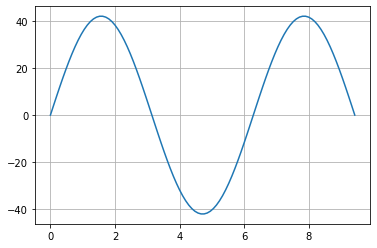

In [94]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3*np.pi, 100)
y = 42 * np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.show()